In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np

# Load dataset
heart_data = df= pd.read_csv('heart_disease_data.csv')
df = heart_data

# Separate features and target variable
X = df.drop("target", axis=1)
y = df["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.74


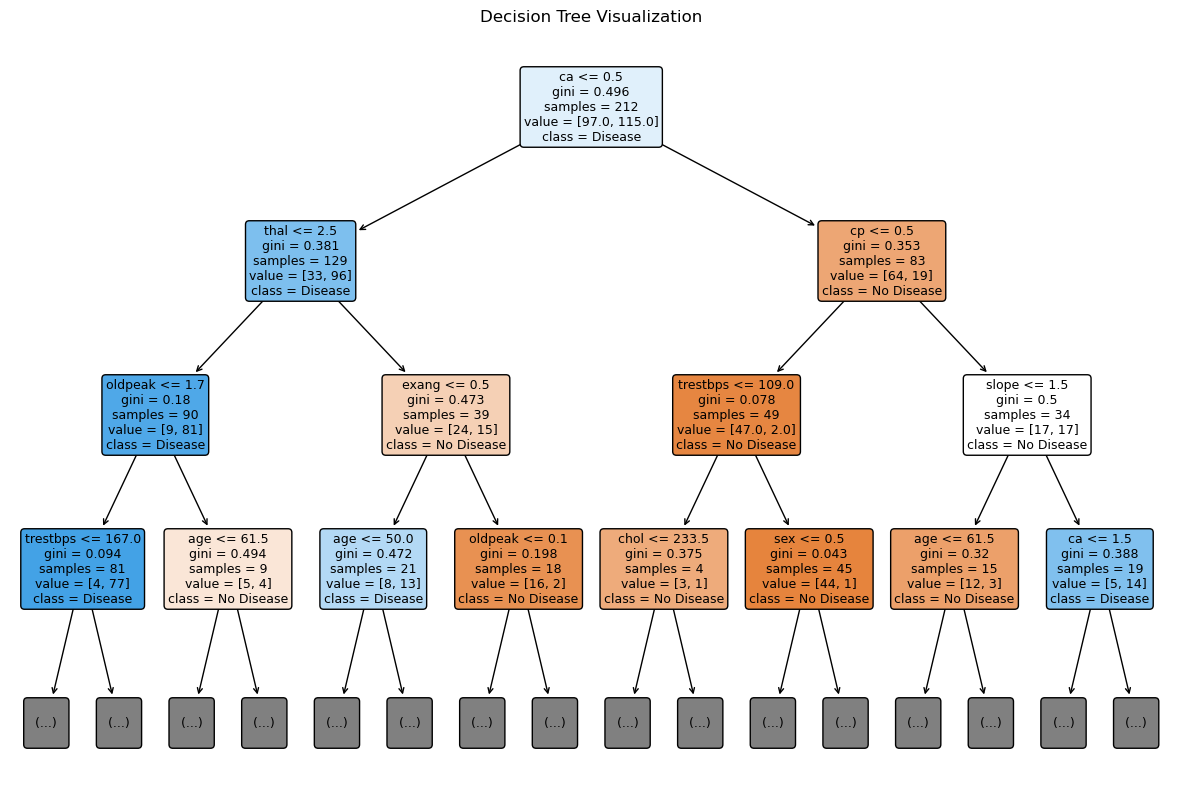

In [13]:
# Plot and save Decision Tree Visualization
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=["No Disease", "Disease"], 
          filled=True, 
          rounded=True, 
          max_depth=3, 
          fontsize=9)  # Increase font size for better visibility inside the boxes
plt.title("Decision Tree Visualization")

# Save the figure with high resolution
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()  # Ensure the plot is shown


In [14]:
# Feature Importance Plot
importances = clf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

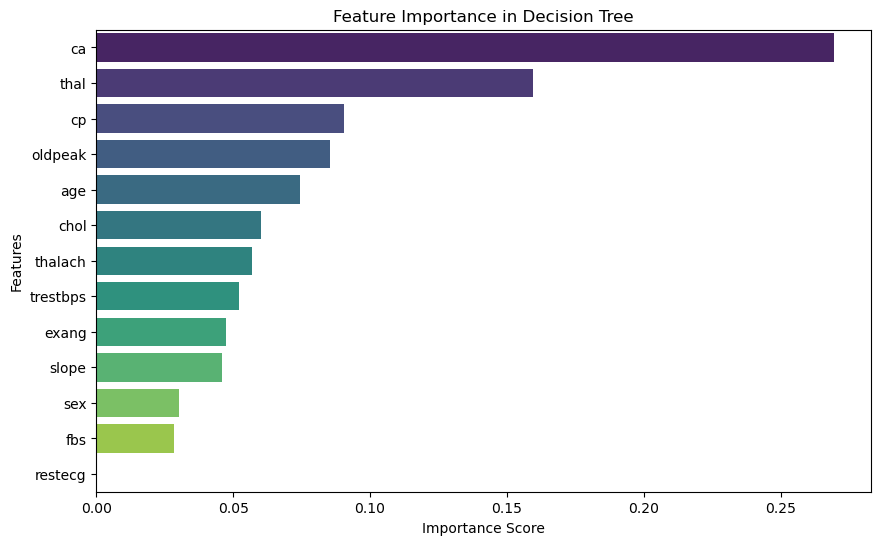

In [15]:

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_df["Importance"], y=feat_imp_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()

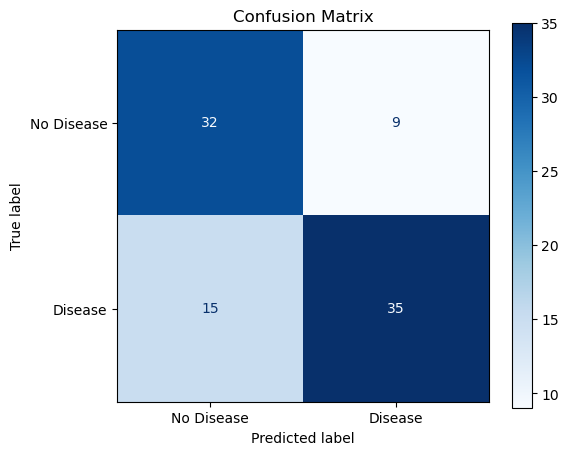

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust figure size
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()